# Dados de Consumo

Demonstração de algumas das opções disponiveis na biblioteca para tratar dados de consumo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import locale
locale.setlocale(locale.LC_TIME, "pt_PT") # processar datas em PT
import sys
import os
sys.path.append('../../src')
import aosol.series.consumo as series

# Perfil de consumo Eredes

## Ajustado ao consumo anual

Utiliza perfil de consumo médio e ajusta para um valor de consumo anual.

$Perfil_{Ajustado} = \frac{Perfil_{E-Redes}*Consumo_{Anual}}{1000}$

É necessário escolher o perfil adequado:

| | Potencia Contratada (kVA) | Energia (kWh) | Opção |
|--|---|--|--|
| Classe A |  > 13.8 | Qualquer | 'BTN A' |
| Classe B | <= 13.8 | > 7140 | 'BTN B' |
| Classe C | <= 13.8 | <= 7140 | 'BTN C' |


In [2]:
# =====================
# Consumo
# =====================
ano_consumo = 2023
perfil = 'BTN C' # ver na document
consumo_anual = 1200 # kWh, exemplo consumo médio 100 kWh/mes
fich_perfil_eredes = r"./consumo/perfis_eredes/E-REDES_Perfil_Consumo_2023.csv"

In [3]:
perfil_eredes = series.leitura_perfis_eredes(fich_perfil_eredes, perfil)
consumo = series.ajustar_perfil_eredes_a_consumo_anual(perfil_eredes, consumo_anual, 'BTN C', 'consumo')

Consumo anual = 1200.0 kWh


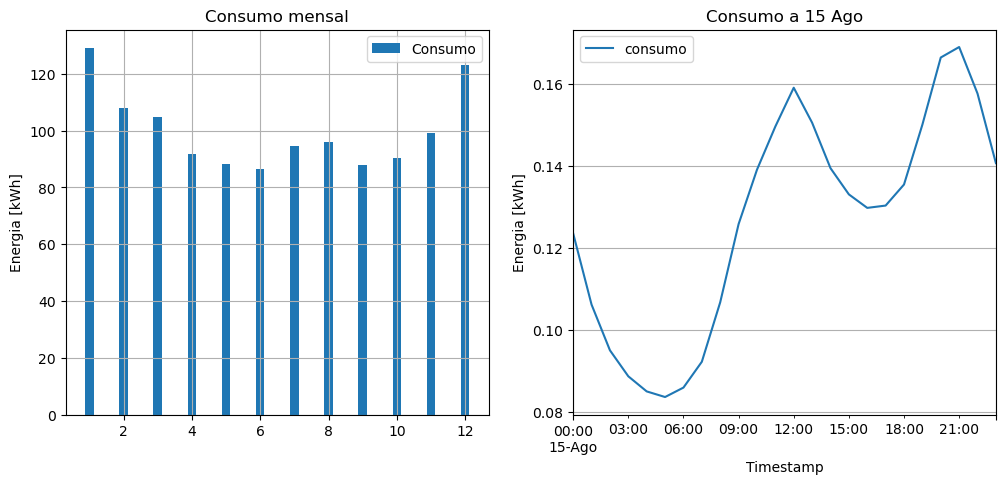

In [4]:
consumo_mensal = consumo['consumo'].resample('M').sum()

width = 0.25
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].bar(consumo_mensal.index.month, consumo_mensal, width=width, label='Consumo')
ax[0].set_ylabel('Energia [kWh]')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Consumo mensal')

consumo.loc[consumo.index.dayofyear == 227, 'consumo'].plot(ax=ax[1])
ax[1].set_ylabel('Energia [kWh]')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Consumo a 15 Ago')

print("Consumo anual = {:.1f} kWh".format(consumo['consumo'].sum()))

## Ajustado ao consumo mensal

Em vez de ajustar ao consumo anual, ajusta ao consumo de cada mês

In [5]:
mensal = pd.DataFrame({
    'mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'mensal_kwh':[120., 120, 100., 100., 80., 80., 80., 80., 100., 100., 120., 120.]
})
mensal = mensal.set_index('mes')

consumo = series.ajustar_perfil_eredes_a_consumo_mensal(perfil_eredes, 'BTN C', mensal, 'mensal_kwh', 'consumo')

Consumo anual = 1200.0 kWh


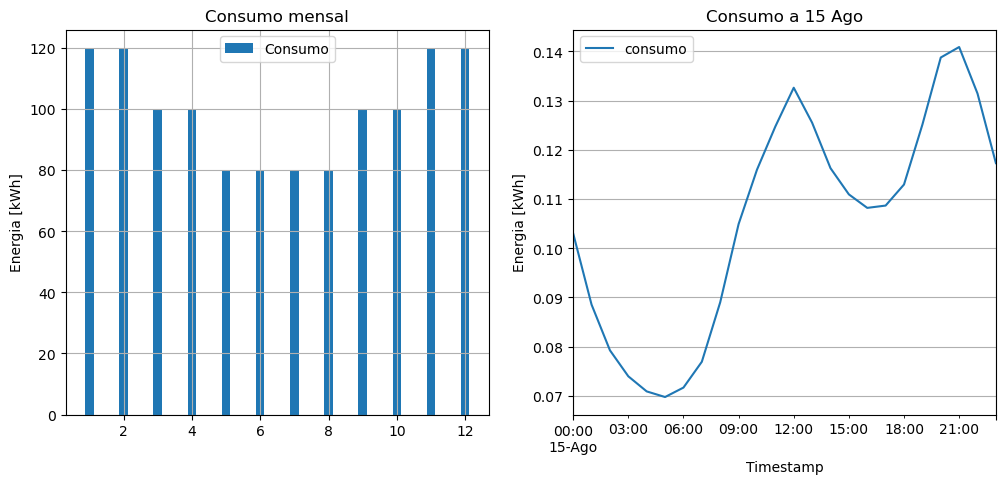

In [6]:
consumo_mensal = consumo['consumo'].resample('M').sum()

width = 0.25
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].bar(consumo_mensal.index.month, consumo_mensal, width=width, label='Consumo')
ax[0].set_ylabel('Energia [kWh]')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Consumo mensal')

consumo.loc[consumo.index.dayofyear == 227, 'consumo'].plot(ax=ax[1])
ax[1].set_ylabel('Energia [kWh]')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Consumo a 15 Ago')

print("Consumo anual = {:.1f} kWh".format(consumo['consumo'].sum()))

# Historico de consumos do utilizador

Obtido no balcão digital da e-redes https://balcaodigital.e-redes.pt/home

Em balcão digital > os meus locais > Produção, consumo, potência > Historico de consumos

A pasta consumo/historico contêm um exemplo de ficheiro descarregado:
* a função percorre uma pasta e tenta encontrar todos os ficheiro com <ano_consumo>.xlsx no nome
* é possivel alterar o ano por forma a alinhar com dados de produção por exemplo, para isso configurar ano_a_considerar
* é necessário alguns dados sobre o ficheiro excel, nomeadamente a folha (worksheet) e os seguinte parametros

<img src="../../../exemplos/consumo/historico/Exemplo_cabecalho.png" alt="description" width="500" height="200">

In [9]:
# =====================
# Consumo
# =====================
pasta_ficheiro_consumo = os.path.join(".", "consumo","historico")
ano_consumo = 2022
ano_a_considerar = 2023
col_consumo = "Consumo registado (kW)"
worksheet = "Consumos"
n_linhas_cabecalho = 14

consumo = series.leitura_ficheiros_mensais_medicao_eredes(pasta_ficheiro_consumo, ano_consumo, col_consumo=col_consumo, ano_a_considerar=ano_a_considerar, worksheet=worksheet, n_linhas_cabecalho=n_linhas_cabecalho)

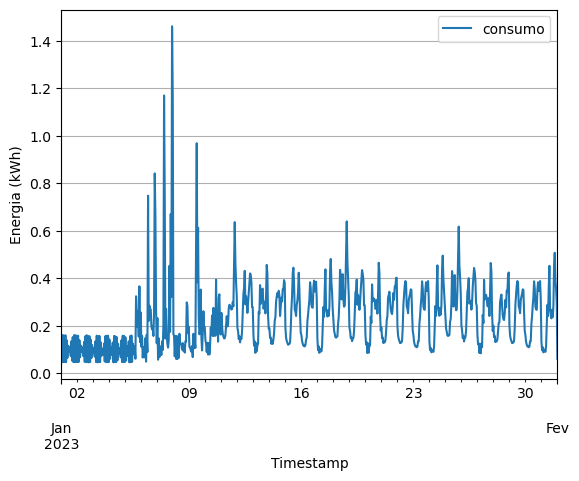

In [13]:
consumo.plot()
plt.ylabel('Energia (kWh)')
plt.grid()